In [1]:
from utils import get_prepared_data, get_layers_info, set_plt
from tensorflow import keras
from tensorflow.python.keras import layers
from constants import *
import matplotlib.pyplot as plt
from tqdm import tqdm
from pathlib import Path
import datetime;

2022-11-14 00:19:09.898963: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-14 00:19:10.044672: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-11-14 00:19:10.044691: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-11-14 00:19:10.070186: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-11-14 00:19:10.551661: W tensorflow/stream_executor/platform/de

In [2]:
(x_train, y_train), (x_test, y_test) = get_prepared_data()
input_picture_shape = x_train.shape[1:]
num_classes = y_train.shape[1]
input_picture_shape

(28, 28, 1)

In [3]:
all_models = []
all_descriptions = []
all_titles = []

changed_param = "pool_size"
for pool_size in [2, 3, 4]:
    model_layers = [
        keras.Input(shape=input_picture_shape),
        layers.Conv2D(filters=32, kernel_size=(3, 3), activation=ACT_RELU),
        layers.MaxPooling2D(pool_size=(pool_size, pool_size), strides=1),
        layers.Conv2D(filters=64, kernel_size=(3, 3), activation=ACT_RELU),
        layers.MaxPooling2D(pool_size=(pool_size, pool_size), strides=1),
        layers.Flatten(),
        layers.Dense(num_classes, activation="softmax"),
    ]
    model = keras.Sequential(model_layers)
    all_models.append(model)
    all_titles.append(pool_size)
    all_descriptions.append(get_layers_info(model_layers))
all_descriptions

2022-11-14 00:19:11.240116: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-11-14 00:19:11.240136: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2022-11-14 00:19:11.240151: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (kamilasproska-VivoBook-ASUSLaptop-X515UA-M515UA): /proc/driver/nvidia/version does not exist
2022-11-14 00:19:11.240608: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


[0  n          type filters kernel_size activation pool_size strides
 1  0        Conv2D      32      (3, 3)       relu                  
 2  1  MaxPooling2D                                   (2, 2)  (1, 1)
 3  2        Conv2D      64      (3, 3)       relu                  
 4  3  MaxPooling2D                                   (2, 2)  (1, 1),
 0  n          type filters kernel_size activation pool_size strides
 1  0        Conv2D      32      (3, 3)       relu                  
 2  1  MaxPooling2D                                   (3, 3)  (1, 1)
 3  2        Conv2D      64      (3, 3)       relu                  
 4  3  MaxPooling2D                                   (3, 3)  (1, 1),
 0  n          type filters kernel_size activation pool_size strides
 1  0        Conv2D      32      (3, 3)       relu                  
 2  1  MaxPooling2D                                   (4, 4)  (1, 1)
 3  2        Conv2D      64      (3, 3)       relu                  
 4  3  MaxPooling2D             

In [4]:
for model in all_models:
    model.compile(loss="categorical_crossentropy", optimizer=OPT_RMS_PROP, metrics=["accuracy"])

In [5]:
batch_size = 128
epochs = 5
all_history = []
for model in tqdm(all_models, colour="RED"):
    history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)
    all_history.append(history)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch 1/5
422/422 [==============================] - 49s 115ms/step - loss: 0.1522 - accuracy: 0.9531 - val_loss: 0.0497 - val_accuracy: 0.9865
Epoch 2/5
422/422 [==============================] - 49s 117ms/step - loss: 0.0467 - accuracy: 0.9856 - val_loss: 0.0435 - val_accuracy: 0.9883
Epoch 3/5
422/422 [==============================] - 49s 116ms/step - loss: 0.0323 - accuracy: 0.9903 - val_loss: 0.0347 - val_accuracy: 0.9915
Epoch 4/5
422/422 [==============================] - 49s 115ms/step - loss: 0.0252 - accuracy: 0.9923 - val_loss: 0.0311 - val_accuracy: 0.9900
Epoch 5/5
422/422 [==============================] - 49s 117ms/step - loss: 0.0195 - accuracy: 0.9941 - val_loss: 0.0355 - val_accuracy: 0.9925


 33%|███▎      | 1/3 [04:05<08:10, 245.07s/it]

Epoch 1/5
422/422 [==============================] - 48s 113ms/step - loss: 0.1516 - accuracy: 0.9550 - val_loss: 0.0524 - val_accuracy: 0.9860
Epoch 2/5
422/422 [==============================] - 38s 89ms/step - loss: 0.0468 - accuracy: 0.9857 - val_loss: 0.0333 - val_accuracy: 0.9887
Epoch 3/5
422/422 [==============================] - 37s 87ms/step - loss: 0.0331 - accuracy: 0.9896 - val_loss: 0.0340 - val_accuracy: 0.9897
Epoch 4/5
422/422 [==============================] - 37s 88ms/step - loss: 0.0271 - accuracy: 0.9920 - val_loss: 0.0368 - val_accuracy: 0.9907
Epoch 5/5
422/422 [==============================] - 38s 89ms/step - loss: 0.0225 - accuracy: 0.9929 - val_loss: 0.0304 - val_accuracy: 0.9917


 67%|██████▋   | 2/3 [07:22<03:36, 216.86s/it]

Epoch 1/5
422/422 [==============================] - 40s 94ms/step - loss: 0.1795 - accuracy: 0.9469 - val_loss: 0.0605 - val_accuracy: 0.9843
Epoch 2/5
422/422 [==============================] - 40s 94ms/step - loss: 0.0498 - accuracy: 0.9840 - val_loss: 0.0430 - val_accuracy: 0.9875
Epoch 3/5
422/422 [==============================] - 39s 92ms/step - loss: 0.0371 - accuracy: 0.9882 - val_loss: 0.0309 - val_accuracy: 0.9917
Epoch 4/5
422/422 [==============================] - 40s 94ms/step - loss: 0.0306 - accuracy: 0.9907 - val_loss: 0.0323 - val_accuracy: 0.9905
Epoch 5/5
422/422 [==============================] - 38s 90ms/step - loss: 0.0257 - accuracy: 0.9922 - val_loss: 0.0305 - val_accuracy: 0.9923


100%|██████████| 3/3 [10:38<00:00, 212.83s/it]


In [6]:
# score = model.evaluate(x_test, y_test, verbose=0)

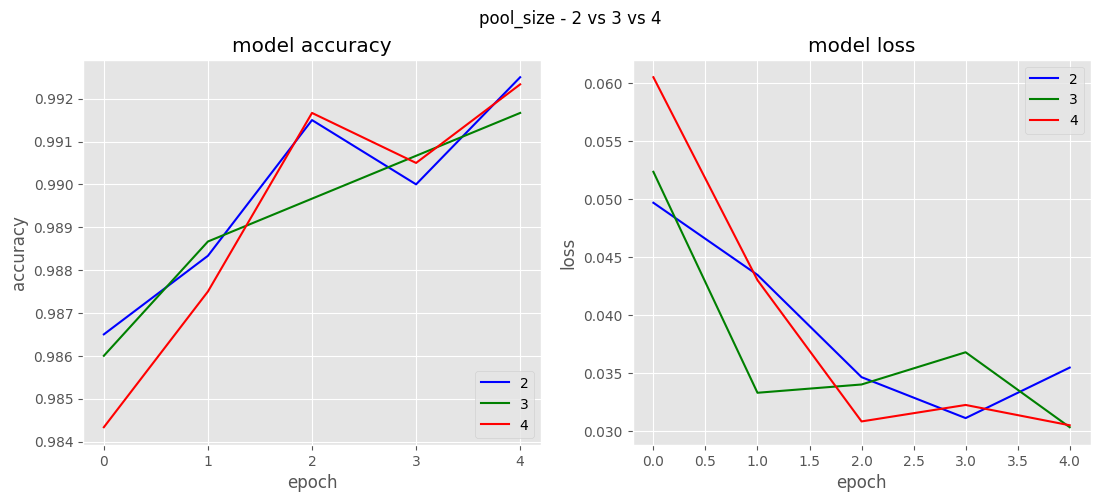

In [9]:
all_title =  f"{changed_param} - " + " vs ".join([str(x) for x in all_titles])
set_plt(all_history, all_titles, all_title)
all_title += f"_{datetime.datetime.now()}"
plt.savefig(f'plots/{all_title}.png')
plt.show()
for i, df in enumerate(all_descriptions):
    df.to_csv(Path(f"csvs/{all_title}_{i}.csv"), index=False)